In [22]:
!pip install scikit-plot

In [121]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,precision_score,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [77]:
#loading filepath using pandas
filepath="https://github.com/wri/global-power-plant-database/raw/master/source_databases_csv/database_IND.csv"
data=pd.read_csv(filepath)

In [78]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
## Finding the missing Value
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

1. There are lot of missing Value
2. There are 908 rows and in many columns there is no data so we will drop that column
3. 'wepp_id','estimated_generation_gwh','other_fuel3' have 908 missing value i.e equals to the row
4. 'other_fuel2' has 907 missing value and 'other_fuel1' have more than 80% of missing value
5. The column more than 50% missing value are 'generation_gwh_2013','generation_gwh_2014','generation_gwh_2015',
   'generation_gwh_2016','generation_gwh_2017' and the Owner
6. We can also delete country_long because country also contain same information

## Count the values present in each Column

In [80]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

country
IND    908
Name: country, dtype: int64

country_long
India    908
Name: country_long, dtype: int64

name
RAICHUR STEEL                   1
Udumalpet Wind Farm             1
ROPAR                           1
BARGI                           1
Kaladonger Wind Farm            1
                               ..
SHAHPUR                         1
DURGAPUR                        1
THANE PLANT                     1
Pratapgarh Solar Power Plant    1
ANUPPUR                         1
Name: name, Length: 908, dtype: int64

gppd_idnr
WRI1026091    1
WRI1019896    1
WRI1026126    1
IND0000500    1
WRI1026677    1
             ..
IND0000247    1
IND0000521    1
IND0000411    1
IND0000152    1
WRI1019909    1
Name: gppd_idnr, Length: 908, dtype: int64

capacity_mw
5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
31.2       1
105.7      1
63.2       1
49.6       1
2.5        1
Name: capacity_mw, Length: 365, dtype: int64

latitude
24.1917    3
19.0004    3
10.3118 

In [81]:
data = data.drop(['other_fuel1', 'other_fuel2','other_fuel3','wepp_id','estimated_generation_gwh','country_long'],axis=1)

In [82]:
data


,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority
904,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


## We will add 'Fuel_type' column based upon the Primary_fuel

In [84]:
#added a new column called "renewable" based upon primary_fuel which one is renewable fuel and non-renewable fuel
renewable = ['Hydro','Other_renewable','Wind','Solar']
data['Fuel_type'] = ['renewable' if i in renewable else 'non-renewable' for i in data['primary_fuel'] ]
data.head()


,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Fuel_type
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-renewable
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,non-renewable
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,non-renewable


In [85]:
data

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Fuel_type
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-renewable
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,non-renewable
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,non-renewable
904,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
905,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
906,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-renewable


## We will convert the Fuel_type into float value

In [86]:
data['Fuel_type']=data['Fuel_type'].map({'renewable':1,'non-renewable':0}).astype(float)

In [87]:
data

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,Fuel_type
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,0.0
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,0.0
904,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
905,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
906,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


1.We will remove the column which contain 'NaN' values 
2. We will Add the Capacity column based uopn the capacity_mw

In [88]:
## removing NAN Values

MIN_CAPACITY_FACTOR = 0.01
MAX_CAPACITY_FACTOR = 1.0

# create new data frame with relevant predictor variable (X) columns and 2016 generation
# clean data frame by removing NaNs
cols_to_include = ['capacity_mw','latitude','longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Fuel_type']
data = data[cols_to_include].dropna(how='any')

In [89]:
# convert 2016 generation into capacity factor and remove rows with erroneous capacity factors
data['capacity_factor'] = data.apply(lambda row:row['generation_gwh_2016']/(24.0*365.0*0.001*row['capacity_mw']),axis=1)
data = data[data.capacity_factor >= MIN_CAPACITY_FACTOR]
data = data[data.capacity_factor <= MAX_CAPACITY_FACTOR]
#y_data_generation = data['generation_gwh_2016'].as_matrix()
#df_clean = data.drop('generation_gwh_2016',axis=1)

In [90]:
data

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Fuel_type,capacity_factor
3,135.0,23.8712,91.3602,2004.0,631.777928,617.789264,843.74700,886.004428,663.774500,0.0,0.749200
4,1800.0,21.9603,82.4091,2015.0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,0.0,0.395928
5,250.0,23.7689,68.6447,2005.0,821.798000,1153.421000,1208.85200,1175.765000,1147.913000,0.0,0.536879
6,60.0,10.4547,77.0078,1970.0,147.568450,157.558250,152.19520,61.421350,89.629600,1.0,0.116859
7,192.0,32.2258,77.2070,2010.0,696.738800,674.391100,721.33520,675.724400,679.594950,1.0,0.401758
...,...,...,...,...,...,...,...,...,...,...,...
883,400.0,30.5669,79.5468,2006.0,435.710500,1806.860300,1204.59675,2031.839750,2150.095500,1.0,0.579863
890,1470.0,22.8725,73.3588,1986.0,4542.028000,6753.870000,5161.53800,3539.630000,7018.217000,0.0,0.274876
891,540.0,20.2727,78.9792,2010.0,2311.320000,1045.820000,1651.15890,1229.480000,999.170000,0.0,0.259910
894,62.4,30.3033,77.5684,1991.0,203.975000,184.453100,183.00000,204.253600,175.866250,1.0,0.373664


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 3 to 900
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          349 non-null    float64
 1   latitude             349 non-null    float64
 2   longitude            349 non-null    float64
 3   commissioning_year   349 non-null    float64
 4   generation_gwh_2013  349 non-null    float64
 5   generation_gwh_2014  349 non-null    float64
 6   generation_gwh_2015  349 non-null    float64
 7   generation_gwh_2016  349 non-null    float64
 8   generation_gwh_2017  349 non-null    float64
 9   Fuel_type            349 non-null    float64
 10  capacity_factor      349 non-null    float64
dtypes: float64(11)
memory usage: 32.7 KB


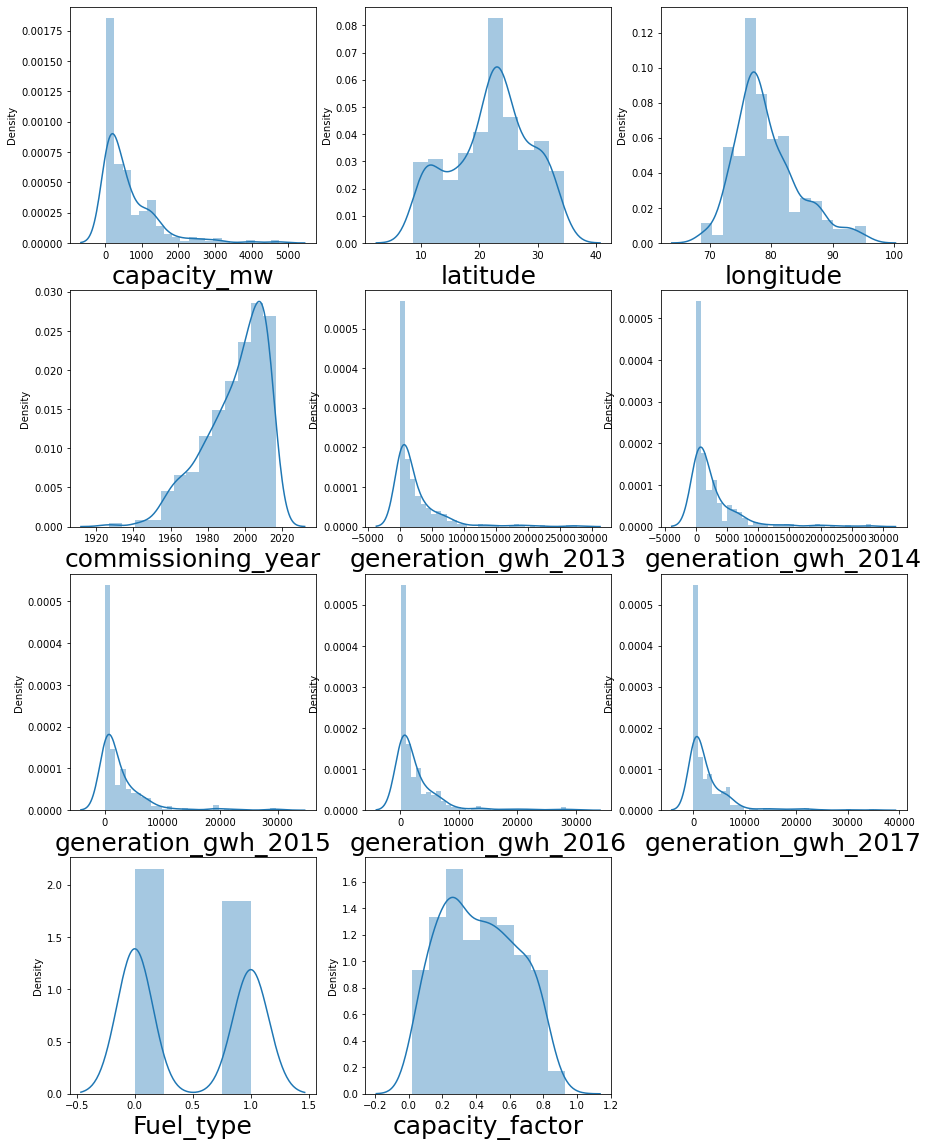

In [92]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in data:
    if plotnumber<=11:
        
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

In [93]:
data.corr()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Fuel_type,capacity_factor
capacity_mw,1.000000,0.038442,-0.003076,0.315287,0.825563,0.883849,0.897598,0.915687,0.920281,-0.468458,0.307956
latitude,0.038442,1.000000,0.110327,0.171584,0.027372,0.034861,0.032305,0.035260,0.052523,0.059961,0.185923
longitude,-0.003076,0.110327,1.000000,0.082553,0.004841,0.012388,0.030458,0.050710,0.064344,-0.115779,0.212393
commissioning_year,0.315287,0.171584,0.082553,1.000000,0.162374,0.213008,0.238781,0.255033,0.258711,-0.459698,0.192790
generation_gwh_2013,0.825563,0.027372,0.004841,0.162374,1.000000,0.967962,0.906354,0.892285,0.856575,-0.395632,0.454836
generation_gwh_2014,0.883849,0.034861,0.012388,0.213008,0.967962,1.000000,0.971089,0.956349,0.929890,-0.423185,0.480194
generation_gwh_2015,0.897598,0.032305,0.030458,0.238781,0.906354,0.971089,1.000000,0.982739,0.958520,-0.420357,0.496741
generation_gwh_2016,0.915687,0.035260,0.050710,0.255033,0.892285,0.956349,0.982739,1.000000,0.978878,-0.423813,0.517882
generation_gwh_2017,0.920281,0.052523,0.064344,0.258711,0.856575,0.929890,0.958520,0.978878,1.000000,-0.430280,0.478884
Fuel_type,-0.468458,0.059961,-0.115779,-0.459698,-0.395632,-0.423185,-0.420357,-0.423813,-0.430280,1.000000,-0.397338


<AxesSubplot:>

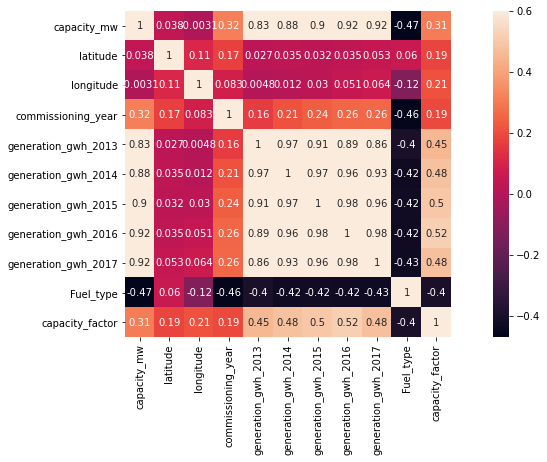

In [94]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(), vmax=0.6, square=True, annot=True)

In [95]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Fuel_type,capacity_factor
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,630.735160,22.010758,79.290987,1994.842407,2507.954053,2724.392382,2767.142685,2751.925836,2793.815798,0.461318,0.416347
std,744.968188,6.691739,5.166264,16.523784,3919.523932,4209.102020,4485.164077,4461.346275,4506.766356,0.499217,0.225309
min,27.000000,8.531900,68.644700,1927.000000,0.000000,0.000000,0.000000,12.676300,0.000000,0.000000,0.017094
25%,110.000000,17.297000,76.113700,1984.000000,278.251750,326.041600,306.379000,283.748110,272.739450,0.000000,0.235206
50%,396.000000,22.420800,77.865900,2000.000000,1009.043000,1123.285350,986.247350,1004.908000,999.170000,0.000000,0.402855
75%,920.000000,27.022100,82.409100,2009.000000,3152.000000,3274.840000,3480.740000,3364.420000,3459.695000,1.000000,0.601621
max,4760.000000,34.490300,95.408000,2017.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000,0.927635


In [96]:
data.skew()

capacity_mw            2.360446
latitude              -0.229299
longitude              0.874606
commissioning_year    -0.963851
generation_gwh_2013    3.272933
generation_gwh_2014    3.151795
generation_gwh_2015    3.421393
generation_gwh_2016    3.358910
generation_gwh_2017    3.451648
Fuel_type              0.155864
capacity_factor        0.145771
dtype: float64

## To remove Outlier using Z-Score

In [97]:
from scipy.stats import zscore
import numpy as np

In [98]:
z=np.abs(zscore(data))
threshold=3
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(349, 11)
(332, 11)


In [99]:
data.skew()

capacity_mw            2.360446
latitude              -0.229299
longitude              0.874606
commissioning_year    -0.963851
generation_gwh_2013    3.272933
generation_gwh_2014    3.151795
generation_gwh_2015    3.421393
generation_gwh_2016    3.358910
generation_gwh_2017    3.451648
Fuel_type              0.155864
capacity_factor        0.145771
dtype: float64

## Using LabelEncoder to remove skewness

In [100]:
for i in data.columns:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

In [101]:
data.skew()

capacity_mw           -0.037236
latitude               0.029099
longitude              0.002144
commissioning_year    -0.800774
generation_gwh_2013    0.003348
generation_gwh_2014    0.004417
generation_gwh_2015    0.001629
generation_gwh_2016    0.000000
generation_gwh_2017    0.007091
Fuel_type              0.155864
capacity_factor        0.000000
dtype: float64

## Spliting The data into 'X' feature and 'Y' as a label or vector

In [168]:
x = data.drop("Fuel_type", axis=1)
y= data["Fuel_type"]

## Train and Test the data into Train_test_split

In [169]:

from sklearn.model_selection import train_test_split, cross_validate
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=31, test_size=.20)

## Building The Model

In [196]:
random_forest = RandomForestClassifier()
random_forest.fit(x_test, y_test)
y_pred = random_forest.predict(x_train)
rf=accuracy_score(y_train, y_pred)
rf

0.8136200716845878

In [197]:
#we will use cross_validation to check whether model is overfitted

cross_rf=cross_val_score(random_forest,x,y,cv=5)

#now i will take the mean of it

cross_rf=cross_val_score(random_forest,x,y,cv=5).mean()
cross_rf

0.8853416149068323

In [198]:

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.9142857142857143
[[33  4]
 [ 2 31]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.89      0.94      0.91        33

    accuracy                           0.91        70
   macro avg       0.91      0.92      0.91        70
weighted avg       0.92      0.91      0.91        70



In [199]:
#we will use cross_validation to check whether model is overfitted

cross_knn=cross_val_score(knn,x,y,cv=5)

#now i will take the mean of it

cross_knn=cross_val_score(knn,x,y,cv=5).mean()
cross_knn

0.8539130434782608

In [200]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.8285714285714286
[[29  8]
 [ 4 29]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.78      0.88      0.83        33

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70



In [201]:
#we will use cross_validation to check whether model is overfitted

cross_lr=cross_val_score(lr,x,y,cv=5)

#now i will take the mean of it

cross_lr=cross_val_score(lr,x,y,cv=5).mean()
cross_lr

0.8165631469979295

In [202]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.8714285714285714
[[34  3]
 [ 6 27]]


In [203]:
#we will use cross_validation to check whether model is overfitted

cross_dt=cross_val_score(dt,x,y)

#now i will take the mean of it

cross_dt=cross_val_score(dt,x,y).mean()
cross_dt

0.8396687370600414

In [204]:
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.8714285714285714
[[34  3]
 [ 6 27]]


In [205]:
cross_svm_clf=cross_val_score(svm_clf,x,y,cv=5)

cross_svm_clf=cross_val_score(svm_clf,x,y,cv=5).mean()
cross_svm_clf

0.8453830227743271

In [206]:

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.8714285714285714
[[34  3]
 [ 6 27]]


In [207]:
cross_gaussian=cross_val_score(gaussian,x,y,cv=5)

cross_gaussian=cross_val_score(gaussian,x,y,cv=5).mean()
cross_gaussian

0.7821946169772256

In [208]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.8714285714285714
[[34  3]
 [ 6 27]]


In [209]:
cross_linear_svc=cross_val_score(linear_svc,x,y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,x,y,cv=5).mean()
cross_linear_svc

0.6500207039337474

In [211]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.8714285714285714
[[34  3]
 [ 6 27]]


In [212]:
cross_sgd=cross_val_score(sgd,x,y,cv=5)

cross_sgd=cross_val_score(sgd,x,y,cv=5).mean()
cross_sgd

0.6819875776397516

## HyperParameter Tunning

In [218]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
search= GridSearchCV(lr, param_grid, cv = 5)

In [219]:
search.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [220]:
best_model = search.best_params_
best_model

{'C': 0.006105402296585327}

In [221]:
logreg = LogisticRegression(C= 0.006105402296585327)
logreg.fit(x, y)
Y_pred = logreg.predict(x)
acc_log = round(logreg.score(x, y) * 100, 2)
acc_log

82.52

## Plotting Roc_Auc_Curve

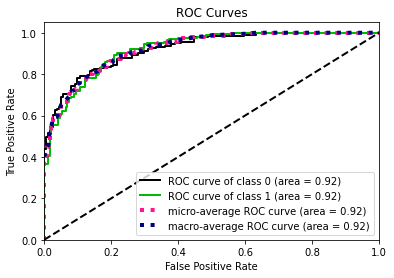

In [222]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=logreg.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving The Model

In [223]:
import joblib
joblib.dump(logreg,"GlobalPowerPlant.pkl")

['GlobalPowerPlant.pkl']